# Revisiting machine learning
### Instructions

Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns
- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP CODE` - we are including state already
- Identify columns that over 85% missing values
- Remove those columns from the dataframe
- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest
    - Note that there are a few null values in the column. We will first replace those null values using the code below:

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```



In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)




In [2]:
# import data as a data frame.
labdata = pd.read_csv('C:/Users/Ish/Documents/Ironhack Bootcamp/Unit 6/Day 5/learningSet.csv')
labdata.shape

C:\Users\Ish\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(95412, 481)

In [3]:
# check for null values by column.
null_percents = pd.DataFrame(labdata.isna().sum()/len(labdata), columns = ['Percent_Nulls']).reset_index()
null_percents.rename(columns = {'index':'Columns'}, inplace = True)
# keep the columns with nulls over the threshold
null_percents = null_percents[null_percents['Percent_Nulls']>0.25]
null_percents

,Columns,Percent_Nulls
23,NUMCHLD,0.870184
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
29,MBGARDEN,0.553955
30,MBBOOKS,0.553955
31,MBCOLECT,0.554584
32,MAGFAML,0.553955
33,MAGFEM,0.553955
34,MAGMALE,0.553955
35,PUBGARDN,0.553955


In [4]:
# create a list of columns to drop based on percentage of null values in list
drop_list = list(null_percents['Columns'])

In [5]:
# drop the columns in droplist but retain the WEALTH1 and WEALTH2 columns.
print('Before drop:', labdata.shape)
for column in drop_list:
    if column not in ['WEALTH1','WEALTH2']:
        labdata.drop([column], axis = 1, inplace = True)
print('After drop:', labdata.shape)
labdata.columns

Before drop: (95412, 481)
After drop: (95412, 411)


Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=411)

In [6]:
# replace " " with "A" in MAILCODE
labdata['MAILCODE'] = labdata['MAILCODE'].apply(lambda x: x.replace(" ","A")) 
labdata['MAILCODE'].value_counts()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [7]:
# replace other instances of " " or "" with NaNs
labdata = labdata.apply(lambda x: x.replace(" ",np.NaN))
labdata = labdata.apply(lambda x: x.replace("",np.NaN))
labdata.head()


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,NaN,NaN,NaN,XXXX,S1,14,46.0,E,H,NaN,NaN,NaN,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,

In [8]:

# check for null values by column.
null_percents2 = pd.DataFrame(labdata.isna().sum()/len(labdata), columns = ['Percent_Nulls']).reset_index()
null_percents2.rename(columns = {'index':'Columns'}, inplace = True)
# keep the columns with nulls over the threshold
null_percents2 = null_percents2[null_percents2['Percent_Nulls']>0.25]
null_percents2


,Columns,Percent_Nulls
6,PVASTATE,0.984719
9,RECINHSE,0.929747
10,RECP3,0.978860
11,RECPGVG,0.998805
12,RECSWEEP,0.983052
17,AGEFLAG,0.309689
19,CHILD03,0.987989
20,CHILD07,0.983587
21,CHILD12,0.981019
22,CHILD18,0.970161


In [9]:
# create new drop_list for newly NaN'd columns
drop_list2 = list(null_percents2['Columns'])

In [10]:
# drop columns but retain WEALTH1, WEALTH2, VETERANS and SOLIH
# drop the columns in droplist but retain the WEALTH1 and WEALTH2 columns.
print('Before drop:', labdata.shape)
for column in drop_list2:
    if column not in ['WEALTH1','WEALTH2', 'VETERANS','SOLIH']:
        labdata.drop(column, axis = 1, inplace = True)
print('After drop:', labdata.shape)
labdata.columns

Before drop: (95412, 411)
After drop: (95412, 368)


Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'DOB',
       'NOEXCH', 'MDMAUD', 'DOMAIN',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=368)

In [11]:
# Select Target columns
# These are our target columns. TARGET_B and TARGET_D
Y = labdata[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [12]:
# select numeric data from labdata and remove target columns.
numeric_data = labdata._get_numeric_data()
numeric_data.drop(columns = ['TARGET_B', 'TARGET_D'], inplace= True)
numeric_data.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [13]:
# Select categorical data from labdata
categorical_data = labdata.select_dtypes('object')
categorical_data.head()


,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


In [14]:
# check the number of nan values in categorical columns.
null_percents_cats = pd.DataFrame(categorical_data.isna().sum()/len(categorical_data)).reset_index()
null_percents_cats

# create a list of columns with more than 85% null values
drop_list_cats = list(null_percents_cats[null_percents_cats[0]> 0.85]['index'])
drop_list_cats 

['SOLIH', 'VETERANS']

In [15]:
# Try to reduce numbers of categories by grouping.
column_distinct_values = dict() 
for column in categorical_data:
    counts = len(categorical_data[column].value_counts())
    column_distinct_values[column] = counts
categorical_value_counts = pd.DataFrame(column_distinct_values.values(),column_distinct_values.keys()).reset_index()
categorical_value_counts

,index,0
0,OSOURCE,895
1,STATE,57
2,ZIP,19938
3,MAILCODE,2
4,NOEXCH,5
5,MDMAUD,28
6,DOMAIN,16
7,CLUSTER,53
8,HOMEOWNR,2
9,GENDER,6


In [16]:
# create an Other category for states with donors fewer than 2500
value_counts = pd.DataFrame(categorical_data['STATE'].value_counts()).reset_index()
value_counts.columns = ['columns','counts']
other_states = list(value_counts[value_counts['counts'] < 2500]['columns'])
other_states

def other_stater(x,state_list):
    if x in state_list:
        return 'other'
    else:
        return x
categorical_data['STATE'] = categorical_data['STATE'].apply(lambda x: other_stater(x,other_states))
categorical_data['STATE'].value_counts()
    

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [17]:
# Drop OSOURCE and ZIP
categorical_data.drop(['OSOURCE','ZIP'], axis = 1, inplace = True)

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# Drop columns in drop_list_cats
#categorical_data = categorical_data.drop(drop_list_cats, axis = 1)
null_percents_cats = pd.DataFrame(categorical_data.isna().sum()).reset_index()
null_percents_cats


,index,0
0,STATE,0
1,MAILCODE,0
2,NOEXCH,7
3,MDMAUD,0
4,DOMAIN,2316
5,CLUSTER,2316
6,HOMEOWNR,22228
7,GENDER,2957
8,DATASRCE,21280
9,SOLIH,89212


In [19]:
# the columns VETERANS only has one unique value and numeroud nans. according to the documentation
# this column refers to the respondents identifying as VETERANS. we can assume that only the YES values are positive and all other values are Unknown.
# We cannot claim that they are No with any certainty, but we certainly do not know what the values are.

categorical_data['VETERANS'].fillna('U', inplace = True)
categorical_data['VETERANS'].value_counts()

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


U    84986
Y    10426
Name: VETERANS, dtype: int64

In [20]:
# the column SOLIH gives information about donor solicitation preferences. The default value is 'can be mailed', whereas
# codes from from 0-6 represent a stated limit on solicitations per year by respondents.
# Assuming that mailing is done on a monthly basis, we can assume that can be mailed = 12 (12 solicitations per year)
categorical_data['SOLIH'].fillna('12', inplace = True)
categorical_data['SOLIH'].value_counts()

12    94905
0       296
1        94
2        75
3        19
4        16
6         7
Name: SOLIH, dtype: int64

In [21]:
# replace the null values with the most common value count. 
print(categorical_data['GENDER'].value_counts())
categorical_data['GENDER'] = categorical_data['GENDER'].fillna('F')

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [22]:
#  Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest

# Define function to convert inputs aside from "F" and "M" to " other"

def non_binary(x):
    if x not in ["F","M"]:
        return "other"
    else:
        return x

categorical_data['GENDER'] = categorical_data['GENDER'].apply(lambda x: non_binary(x))
categorical_data['GENDER'].value_counts()


F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [23]:
categorical_data['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [24]:
# Clean up the domain values.
# create function to recode domain values

def domain_average(x):
    if x == 'U3':
        return 'U2'
    elif x == 'U4':
        return 'U3'
    elif x == 'C3':
        return 'C2'
    elif x == 'C4':
        return 'C3'
    else:
        return x

categorical_data['DOMAIN'] =  categorical_data['DOMAIN'].apply(lambda x: domain_average(x))

categorical_data['DOMAIN'].value_counts()
    





R2    13623
C2    13544
T2    12369
S1    11503
S2     8530
C1     6145
U2     5852
T1     4982
R3     4809
U1     4510
T3     2176
S3     1891
U3     1804
R1     1358
Name: DOMAIN, dtype: int64

In [25]:
# Replace the unknown values with C4
categorical_data['DOMAIN'].fillna('C4', inplace = True)

In [26]:
# split domain column into two columns for location code and for socioeconomic bracket.
# This returns a series with entries consisting of the location codes
categorical_data['DOMAIN_A'] = list(map(lambda x: x[0], categorical_data['DOMAIN']))
# This returns a series with entries consisting of the socioeconomic values
categorical_data['DOMAIN_B'] = list(map(lambda x: x[1], categorical_data['DOMAIN']))

In [27]:
# drop the now redundant DOMAIN column. 

categorical_data.drop('DOMAIN', axis = 1, inplace = True)

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
print('Domain A:\n', categorical_data['DOMAIN_A'].value_counts())
print('Domain B:\n', categorical_data['DOMAIN_B'].value_counts())

Domain A:
 C    22005
S    21924
R    19790
T    19527
U    12166
Name: DOMAIN_A, dtype: int64
Domain B:
 2    53918
1    28498
3    10680
4     2316
Name: DOMAIN_B, dtype: int64


In [29]:
# Fill the NaN values in the column with the most common 
categorical_data['CLUSTER'].fillna(40, inplace=  True) 

#categorical_data['CLUSTER'].isna().sum()    

In [30]:
# check columns for MAILCODE, MDMAUD and NOEXCH for balance

print(categorical_data['MAILCODE'].value_counts())

print(categorical_data['MDMAUD'].value_counts())

print(categorical_data['NOEXCH'].value_counts())




A    94013
B     1399
Name: MAILCODE, dtype: int64
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64
0    61203
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64


In [31]:
# We can drop all of these
drop_list_cats = drop_list_cats + ['MAILCODE', 'MDMAUD', 'NOEXCH']
drop_list_cats


['SOLIH', 'VETERANS', 'MAILCODE', 'MDMAUD', 'NOEXCH']

In [32]:
# Fill HOMEOWNR nans with U for unknown as NaN and U are redundant.
categorical_data['HOMEOWNR'] = categorical_data['HOMEOWNR'].fillna('U')

Replace null values in the columns DATASRCE and GEOCODE2.  
 

In [33]:
categorical_data['DATASRCE'].isna().sum()
categorical_data['DATASRCE'] = categorical_data['DATASRCE'].fillna(categorical_data['DATASRCE'].mode)
categorical_data['GEOCODE2'] = categorical_data['GEOCODE2'].fillna(categorical_data['GEOCODE2'].mode)
print('DATASRCE: ', categorical_data['DATASRCE'].isna().sum())
print('GEOCODE2: ', categorical_data['GEOCODE2'].isna().sum())

DATASRCE:  0
GEOCODE2:  0


In [34]:
# We will keep the column RFA_2X. We will delete rest of the RFA columns 

for col_name in categorical_data.columns:
    if "RFA" in col_name:
        drop_list_cats.append(col_name)  

In [35]:
drop_list_cats.remove('SOLIH')
drop_list_cats.remove('VETERANS')
drop_list_cats.remove('RFA_2R')
drop_list_cats.remove('RFA_2A')

In [36]:
drop_list_cats

['MAILCODE',
 'MDMAUD',
 'NOEXCH',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [37]:
# drop columns in drop_list_cats
categorical_data.drop(drop_list_cats, axis = 1, inplace = True)

In [38]:
categorical_data.isna().sum()

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
SOLIH       0
VETERANS    0
RFA_2R      0
RFA_2A      0
MDMAUD_R    0
MDMAUD_F    0
MDMAUD_A    0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

Remove the columns starting with ADATE_.   
We are assuming that the date when the previous mail was done is not significant in the respondents decision to give donation.   
They may or may not even remember when they received the mail in the previous years.   
And for the column ADATE_2, check the values in the column.   
If the values are pretty much the same, then remove this column as well. 

In [39]:
print(numeric_data['ADATE_2'].value_counts())
# with only 2 unique values, with a ratio of 95399:13, we can afford to drop the heavily imbalanced ADATE_2

drop_list = ['ADATE_2','ADATE_3','ADATE_4','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_11','ADATE_12','ADATE_14','ADATE_16','ADATE_18']


9706    95399
9704       13
Name: ADATE_2, dtype: int64


Check if there are any other null values in the numerical data.
Clean the columns WEALTH2 and TIMELAG. Use appropriate method to fill the null values in these columns.

In [40]:
numeric_nulls = pd.DataFrame(numeric_data.isna().sum()).reset_index()
numeric_nulls = numeric_nulls[numeric_nulls[0]>0]
numeric_nulls.columns = ['Column','NaN/Nulls']
numeric_nulls


,Column,NaN/Nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


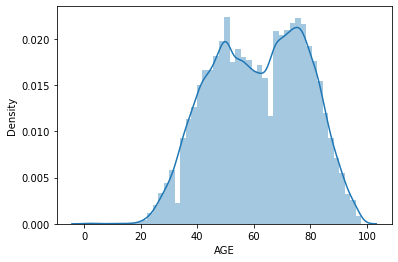

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


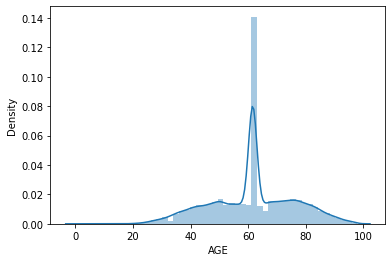

In [41]:
sns.distplot(numeric_data['AGE'])
plt.show()

# fill the null values with the average value  of the column
numeric_data['AGE'] = numeric_data["AGE"].fillna(np.mean(numeric_data['AGE']))

sns.distplot(numeric_data['AGE'])
plt.show()

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


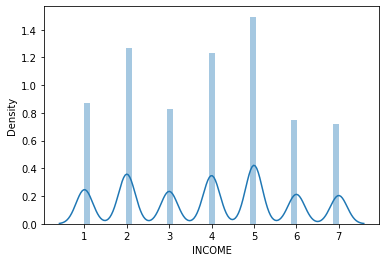

In [42]:
# Visualize the distribution of the data in INCOME
sns.distplot(numeric_data['INCOME'])
plt.show()
 

In [43]:
# rather than having continuous values the values of INCOME appear to be discrete, 
# suggesting that they are bins or categories of income rather than continuous measures.
numeric_data['INCOME'].value_counts()




5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [44]:
# to fill the NaN values with the mean, we will need a method that returns a whole integer.
# we can therefore either use the modal value, 5.0.
numeric_data['INCOME'].fillna(np.ceil(5.0), inplace = True)
numeric_data['INCOME'].isna().sum()
# we should set the dtype as object so that numerical operations will not be carried out on the values
numeric_data['INCOME'] = numeric_data['INCOME'].astype('object')

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


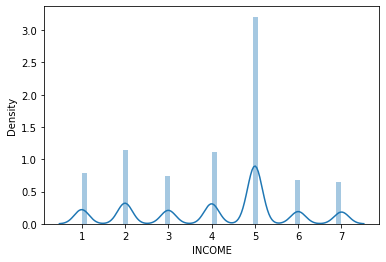

In [45]:
# visualize the INCOME data again.
sns.distplot(numeric_data['INCOME'])
plt.show()

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


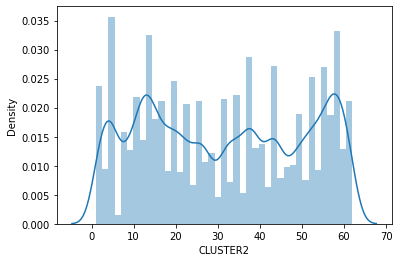

In [46]:
# repeat the process for CLUSTER2
sns.distplot(numeric_data[numeric_data['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [47]:
# rather than the modal value, we will use the mean value, but apply the np.ceil() function.
# it might also be worth considering to use the np.round() function.
numeric_data['CLUSTER2'].fillna(np.ceil(np.mean(numeric_data['CLUSTER2'])), inplace = True)
numeric_data['CLUSTER2'].isna().sum()

0

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


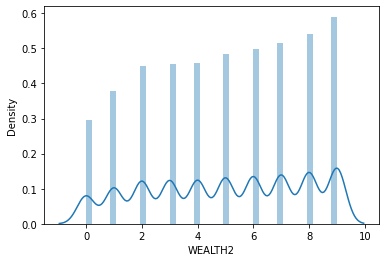

In [48]:
# view the plot of WEALTH2
sns.distplot(numeric_data[numeric_data['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [49]:
# Like the values of INCOME the data for WEALTH seems to be categorical.
# we should therefore find the mean value and convert the column dtype to 'object'
numeric_data['WEALTH2'] = numeric_data['WEALTH2'].astype('object')
numeric_data['WEALTH2'] = numeric_data['WEALTH2'].fillna('9.0')

<AxesSubplot:xlabel='TIMELAG', ylabel='Count'>

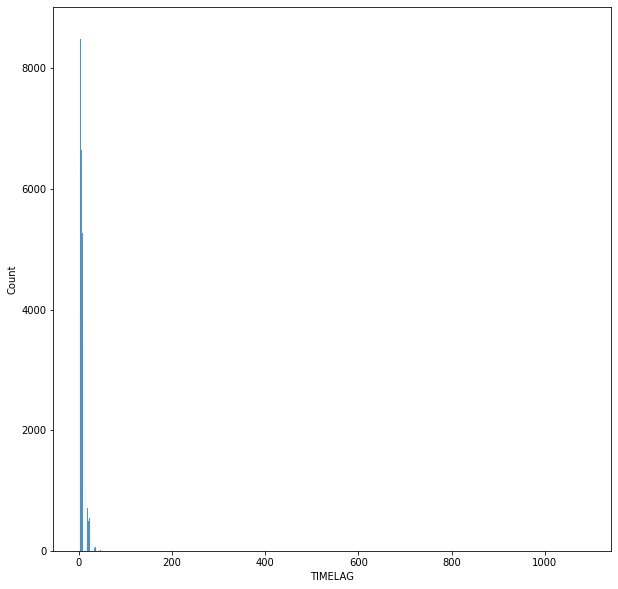

In [50]:
fig = plt.figure(figsize = (10,10))
sns.histplot(numeric_data['TIMELAG'])

In [51]:
# based on the number of unique values in TIMELAG, this column does not seem to be categorical.
# we can therefore fill the null values with some measure of central tendency like the mean
numeric_data['TIMELAG'] = numeric_data['TIMELAG'].fillna(np.ceil(np.mean(numeric_data['TIMELAG'])))

In [52]:
numeric_data.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,2

# LAB 2
Check for null values in the numerical columns.  
Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.  
Use appropriate EDA technique where ever necessary.  

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


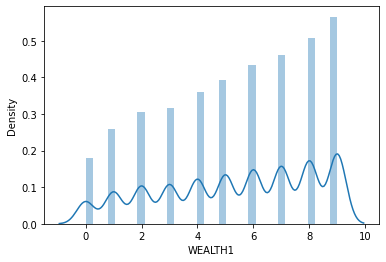

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [53]:
# View WEALTH1 data as a plot
sns.distplot(numeric_data['WEALTH1']) 
plt.show()

numeric_data['WEALTH1'].value_counts()



In [54]:
# Like the values of WEALTH2 the data for WEALTH1 seems to be categorical.
# we should therefore find the mean value and convert the column dtype to 'object'
numeric_data['WEALTH1'] = numeric_data['WEALTH1'].astype('object')
numeric_data['WEALTH1'] = numeric_data['WEALTH1'].fillna('9.0')

## ADI, DMA, MSA

In [55]:
# The ADI (Area Deprivation Index) measures an area's level of socioeconomic deprivation.
# These codes then can be considered continuous measures of relative wealth by area https://www.cdc.gov/pcd/issues/2016/16_0221.htm
numeric_data['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
197.0    2075
109.0    2054
131.0    1978
67.0     1847
201.0    1772
107.0    1746
275.0    1717
233.0    1676
127.0    1651
329.0    1647
75.0     1588
241.0    1573
15.0     1472
83.0     1305
351.0    1193
111.0    1127
279.0    1075
213.0    1073
59.0     1000
157.0     996
129.0     955
181.0     924
281.0     863
0.0       843
367.0     813
271.0     807
577.0     773
263.0     745
335.0     696
63.0      686
209.0     669
179.0     656
455.0     645
291.0     634
337.0     613
269.0     611
215.0     602
245.0     597
315.0     585
71.0      582
221.0     576
307.0     573
203.0     558
133.0     554
277.0     548
77.0      542
319.0     506
383.0     501
301.0     488
427.0     472
53.0      422
199.0     413
17.0      413
113.0     412
187.0     411
303.0     409
321.0     406
177.0     393
451.0     392
243.0     392
361.0     388
211.0     385
173.0     366
175.0     365
185.0     358
61.0      356
207.0 

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


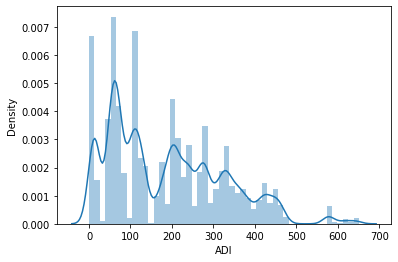

In [56]:
# View the ADI data.
sns.distplot(numeric_data['ADI'])
plt.show()

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


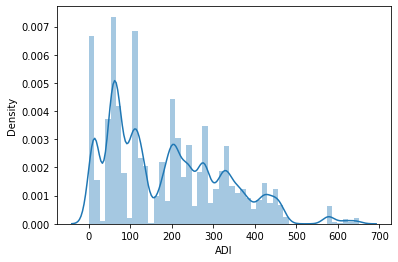

In [57]:
# Given the above, we should treat the values of ASI as continuous, but still employ a method that can return a whole number integer.
# We can replace the NaN values with a mean value.
numeric_data['ADI'] = numeric_data['ADI'].fillna(np.ceil(np.mean(numeric_data['ADI'])))
sns.distplot(numeric_data['ADI'])
plt.show()

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


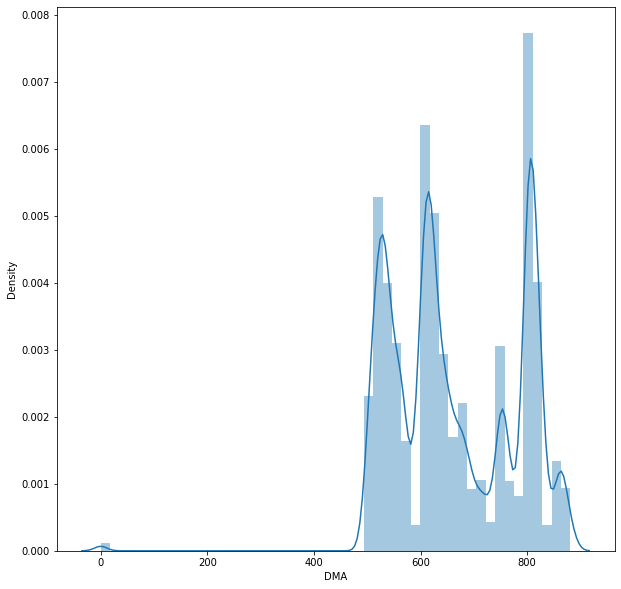

In [58]:
# DMA data or Designated Market Area is classification of areas based on the Television consumption habits of 
# their respective residents.  https://www.nielsen.com/us/en/contact-us/intl-campaigns/dma-maps/ 

# First we could view the MSA data 
fig = plt.figure(figsize = (10,10))
sns.distplot(numeric_data['DMA'])
plt.show()


In [59]:
# Each DMA code therefore represents a geographical area and is a categorical marker.
# As a result it may be a good idea to treat this data as categorical, we can replace null values with the modal value and convert column data to object type.
numeric_data['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
539.0    2222
524.0    2079
623.0    2009
862.0    1847
753.0    1780
618.0    1772
613.0    1717
528.0    1651
534.0    1647
820.0    1638
609.0    1583
751.0    1566
825.0    1472
527.0    1316
560.0    1175
617.0    1127
517.0    1085
567.0    1073
563.0    1000
616.0     993
548.0     955
659.0     917
518.0     863
790.0     813
641.0     788
804.0     773
650.0     754
561.0     690
513.0     661
640.0     656
839.0     645
529.0     641
881.0     640
770.0     635
671.0     611
622.0     597
557.0     588
866.0     582
571.0     567
678.0     565
630.0     564
789.0     548
635.0     547
658.0     542
648.0     512
693.0     511
686.0     501
652.0     488
619.0     481
744.0     449
575.0     436
669.0     435
632.0     424
588.0     422
540.0     414
855.0     413
752.0     403
541.0     397
679.0     394
612.0     387
546.0     387
801.0     386
682.0     384
637.0     363
675.0     363
649.0     363
551.0 

In [60]:
# the most commonly occuring value is "803". we can use this to replace the null values
numeric_data['DMA'].fillna(803, inplace = True)
numeric_data['DMA'] = numeric_data['DMA'].astype('object')
numeric_data['DMA'].isna().sum()

0

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


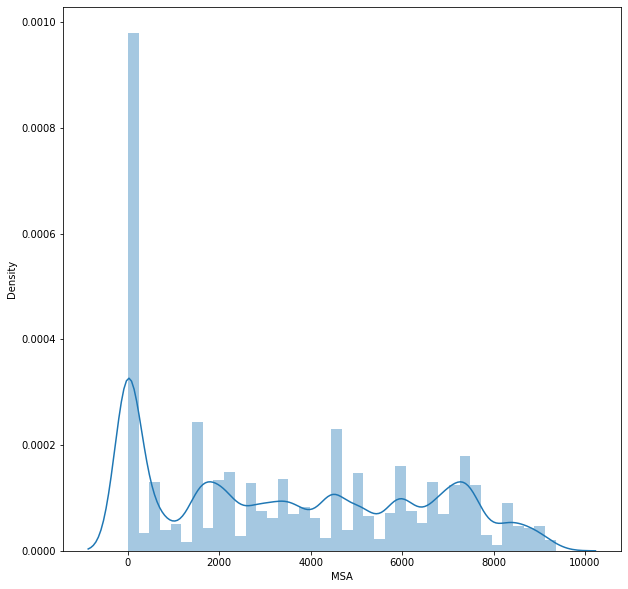

In [61]:
# MSA data 
fig = plt.figure(figsize = (10,10))
sns.distplot(numeric_data['MSA'])
plt.show()

In [62]:
# The MSA data represents the a local location code in the United States https://www.bls.gov/sae/additional-resources/metropolitan-statistical-area-definitions.htm 
# These values therefore are categorical rather than continuous.
# We should then replace the NaN values with the modal value and set the column type as object.
numeric_data['MSA'].fillna(0, inplace = True)
numeric_data['MSA'] = numeric_data['MSA'].astype('object')
numeric_data['MSA'].isna().sum()

0

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NEXTDATE', ylabel='Density'>

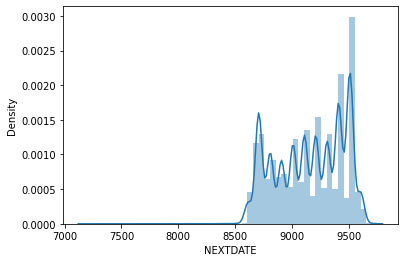

In [63]:
# View NEXTDATE data
sns.distplot(numeric_data['NEXTDATE'])

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NEXTDATE', ylabel='Density'>

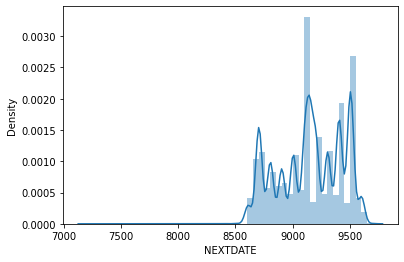

In [64]:
# NEXTDATE appears to be discrete data, as there are only whole number integer values, and only 188 unique values.
# It would be reasonable to assume that these are counts, rather than categorical data.
# A likely method for replacing null values would be using the mean value for NEXTDATE.
numeric_data['NEXTDATE'].fillna(np.ceil(np.mean(numeric_data['NEXTDATE'])), inplace = True)
numeric_data['NEXTDATE'].isna().sum()
sns.distplot(numeric_data['NEXTDATE'])

In [65]:
numeric_nulls = pd.DataFrame(numeric_data.isna().sum()).reset_index()
numeric_nulls = numeric_nulls[numeric_nulls[0]>0]
numeric_nulls.columns = ['Column','NaN/Nulls']
numeric_nulls

,Column,NaN/Nulls
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557
305,ADATE_7,8874
306,ADATE_8,3511
307,ADATE_9,11245
308,ADATE_11,10422
309,ADATE_12,8923
310,ADATE_14,18867
311,ADATE_16,20364


In [66]:
drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_11',
 'ADATE_12',
 'ADATE_14',
 'ADATE_16',
 'ADATE_18']